[View in Colaboratory](https://colab.research.google.com/github/Hoiy/kaggle-santander-value-prediction-challenge/blob/master/eda.ipynb)

In [0]:
import pandas as pd
import numpy as np
import os
import dotenv
import matplotlib.pyplot as plt

dotenv.load_dotenv('.env')

True

In [0]:
types = ['train', 'test']
dfs = {t:pd.read_csv('./raw_data/%s.csv'%t) for t in types}

In [0]:
# data size: 1.5M training, 500k testing, 75:25 split, test data occurs after training data, see below
dfs['train'].shape, dfs['test'].shape

((4459, 4993), (49342, 4992))

In [0]:
# columns
dfs['train'].describe()

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
count,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,...,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.000000,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03
mean,5.944923e+06,1.465493e+04,1.390895e+03,2.672245e+04,4.530164e+03,2.640996e+04,3.070811e+04,1.686522e+04,4.669208e+03,2.569407e+06,...,4.676057e+05,4.446239e+05,8.056219e+05,7.812966e+05,143.529939,1.213809e+05,3.573451e+04,3.123741e+05,9.219960e+04,2.279100e+05
std,8.234312e+06,3.893298e+05,6.428302e+04,5.699652e+05,2.359124e+05,1.514730e+06,5.770590e+05,7.512756e+05,1.879449e+05,9.610183e+06,...,4.068038e+06,4.428889e+06,4.513246e+06,6.839451e+06,9584.318507,4.720709e+06,1.614622e+06,4.318501e+06,1.635993e+06,1.811139e+06
min,3.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.260000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+07,2.000000e+07,4.000000e+06,2.000000e+07,1.480000e+07,1.000000e+08,2.070800e+07,4.000000e+07,1.040000e+07,3.196120e+08,...,7.600000e+07,1.235880e+08,1.300000e+08,1.444000e+08,640000.000000,3.013120e+08,1.064200e+08,1.400000e+08,6.176800e+07,4.320000e+07


In [0]:
feats = {
    'train': dfs['train'][dfs['train'].columns[2:]],
    'test': dfs['test'][dfs['test'].columns[1:]],
}

In [0]:
def constant_columns(df):
  constant_cols = []
  for col in df.columns:
    if len(df[col].unique()) <= 1:
      constant_cols.append(col)
    
  return constant_cols

In [0]:
# Observation 1: constants 0 columns in training data only, but not in testing data

# Constant columns
print(len(constant_columns(feats['train'])))
print(len(constant_columns(feats['test'])))

256
0


In [0]:
# Constant rows
print(len(constant_columns(feats['train'].T)))
print(len(constant_columns(feats['test'].T)))

0
0


In [0]:
# Observation 2: density of testing features is half of training features
# See kernel https://www.kaggle.com/hoiytoiy/train-test-data-difference-in-features-per-row

In [0]:
# rows
dfs['train'][dfs['train'].columns[1:]].T.describe()

,0,1,2,3,4,5,6,7,8,9,...,4449,4450,4451,4452,4453,4454,4455,4456,4457,4458
count,4.992000e+03,4.992000e+03,4.992000e+03,4.992000e+03,4.992000e+03,4.992000e+03,4.992000e+03,4.992000e+03,4.992000e+03,4.992000e+03,...,4.992000e+03,4.992000e+03,4.992000e+03,4.992000e+03,4.992000e+03,4.992000e+03,4992.000000,4.992000e+03,4.992000e+03,4.992000e+03
mean,1.519969e+05,1.066840e+05,1.726763e+04,7.089476e+03,3.868069e+04,1.072901e+06,1.806581e+05,1.511202e+05,4.699319e+04,1.354483e+04,...,8.074920e+04,1.189976e+05,4.780449e+04,8.653846e+03,2.403846e+03,9.221381e+04,5844.350962,4.751221e+05,2.091346e+04,4.149397e+05
std,1.821661e+06,1.529156e+06,3.602498e+05,1.760570e+05,8.722157e+05,5.801377e+06,2.600236e+06,3.173058e+06,5.640394e+05,2.370066e+05,...,2.391898e+06,1.969516e+06,8.775070e+05,3.097643e+05,9.803842e+04,1.142324e+06,44758.556251,8.559149e+06,2.590059e+05,2.885327e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+07,5.000000e+07,1.200000e+07,6.000000e+06,3.766200e+07,2.000000e+08,5.000000e+07,1.000000e+08,2.000000e+07,8.108000e+06,...,1.000000e+08,5.033200e+07,2.156000e+07,1.600000e+07,4.000000e+06,4.808000e+07,800000.000000,3.196120e+08,1.000000e+07,6.400000e+07


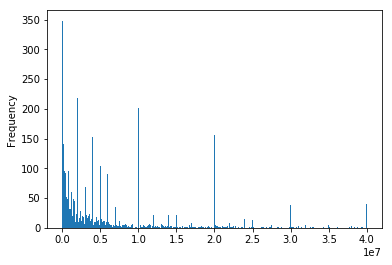

In [0]:
# Observation 3: Spike at 0, 1, 2, 3, 4

dfs['train'].target.plot.hist(bins=500)

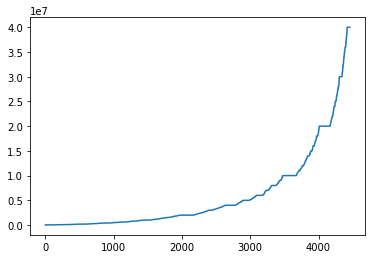

In [0]:
# Hypothesis: Plateau are manual test cases inserted
dfs['train'].target.sort_values().reset_index(drop=True).plot.line()

target
200000.0      113
400000.0      115
1000000.0     129
2000000.0     207
4000000.0     148
5000000.0     101
10000000.0    199
20000000.0    156
dtype: int64

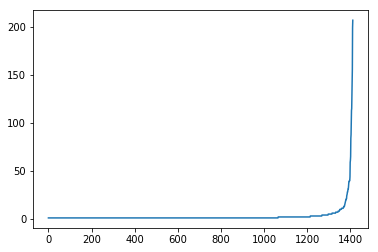

In [0]:
# find the plateau...
target_hist = dfs['train'].groupby('target').size()
target_hist.sort_values().reset_index(drop=True).plot.line()
target_hist[target_hist>=100]

In [0]:
dfs['train'].drop(columns=constant_columns(dfs['train'][feat_cols]), inplace=True)

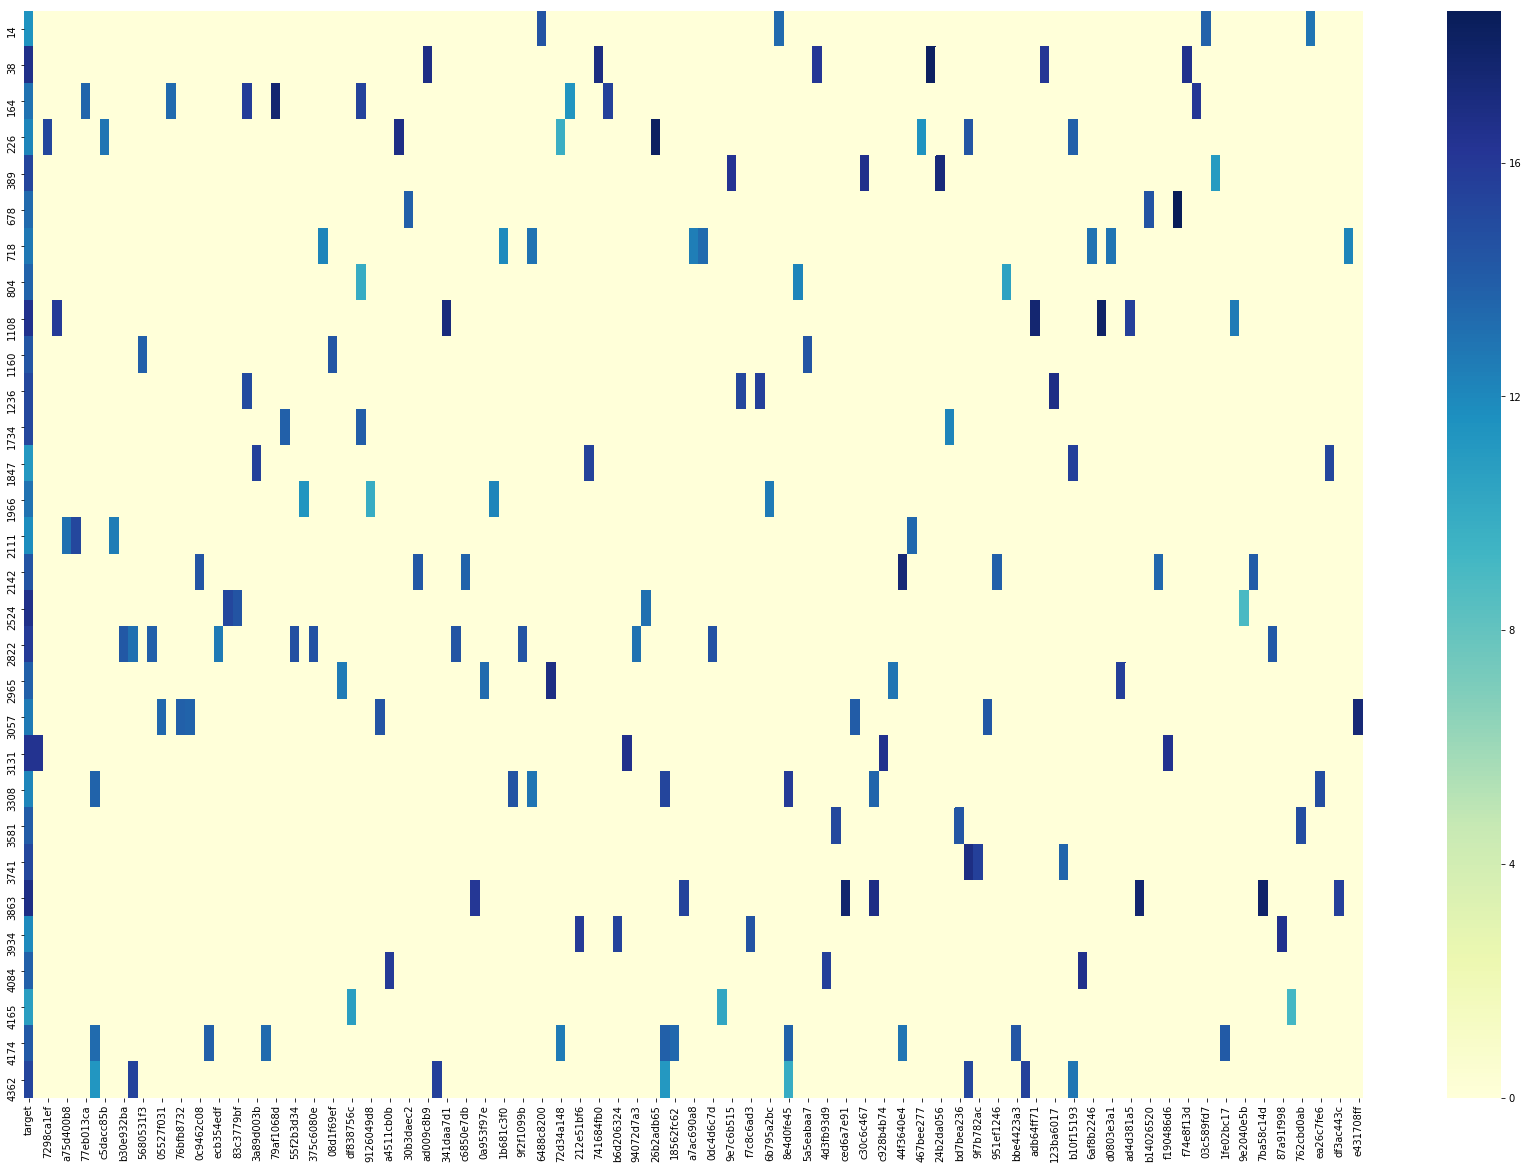

In [0]:
X = pd.read_parquet('./prep/train_log_stats.snappy.parquet')
fishy = X[(X['count'] == X['unique']) & (X['unique'] >= 3)].index
# visual_rows(dfs['train'][dfs['train']['ID'].isin(fishy)])

import seaborn as sns
fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(np.log1p(dfs['train'][dfs['train']['ID'].isin(fishy)].drop(columns=constant_columns(dfs['train'][dfs['train']['ID'].isin(fishy)])).drop(columns=['ID'])), cmap="YlGnBu", ax=ax)

In [0]:
train

NameError: ignored

In [0]:
fishy_rows = dfs['train'][dfs['train'].ID.isin(fishy)]
fishy_rows['median'] = fishy_rows[feat_cols].replace(0, np.NaN).median(axis=1, numeric_only=True)
fishy_rows['mean'] = fishy_rows[feat_cols].replace(0, np.NaN).mean(axis=1, numeric_only=True)
fishy_rows['occur'] = fishy_rows.target.isin(fishy_rows[feat_cols].replace(0, np.NaN))
fishy_rows[['target', 'median', 'mean', 'occur']]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,target,median,mean,occur
14,100000.00,783000.00,9.830000e+05,False
38,18000000.00,17500000.00,2.641667e+07,False
164,454000.00,5250000.00,9.145250e+06,False
226,200000.00,1365333.33,1.340608e+07,False
389,4400000.00,13885000.00,1.456250e+07,False
678,680000.00,2000000.00,4.100000e+07,False
718,344000.00,339000.00,3.390000e+05,False
804,858000.00,40000.00,8.666667e+04,False
1108,15202857.14,18340000.00,2.566833e+07,False
1160,1850000.00,1684000.00,1.488741e+06,False


In [0]:
train_log_stats = pd.read_parquet('./prep/train_log_stats.snappy.parquet')
test_log_stats = pd.read_parquet('./prep/test_log_stats.snappy.parquet')

In [0]:
train_target = pd.read_parquet('./prep/train_log_target.snappy.parquet')
train_target = pd.read_parquet('./prep/train_log_target.snappy.parquet')

In [0]:
train_target.target.min()

10.308985993422082

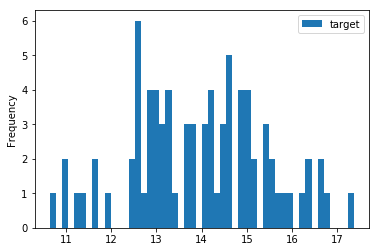

In [0]:
train_target[train_log_feats['count'] >= 1000].plot.hist(bins=50)

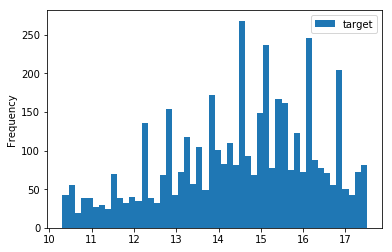

In [0]:
train_target[train_log_feats['count'] < 1000].plot.hist(bins=50)

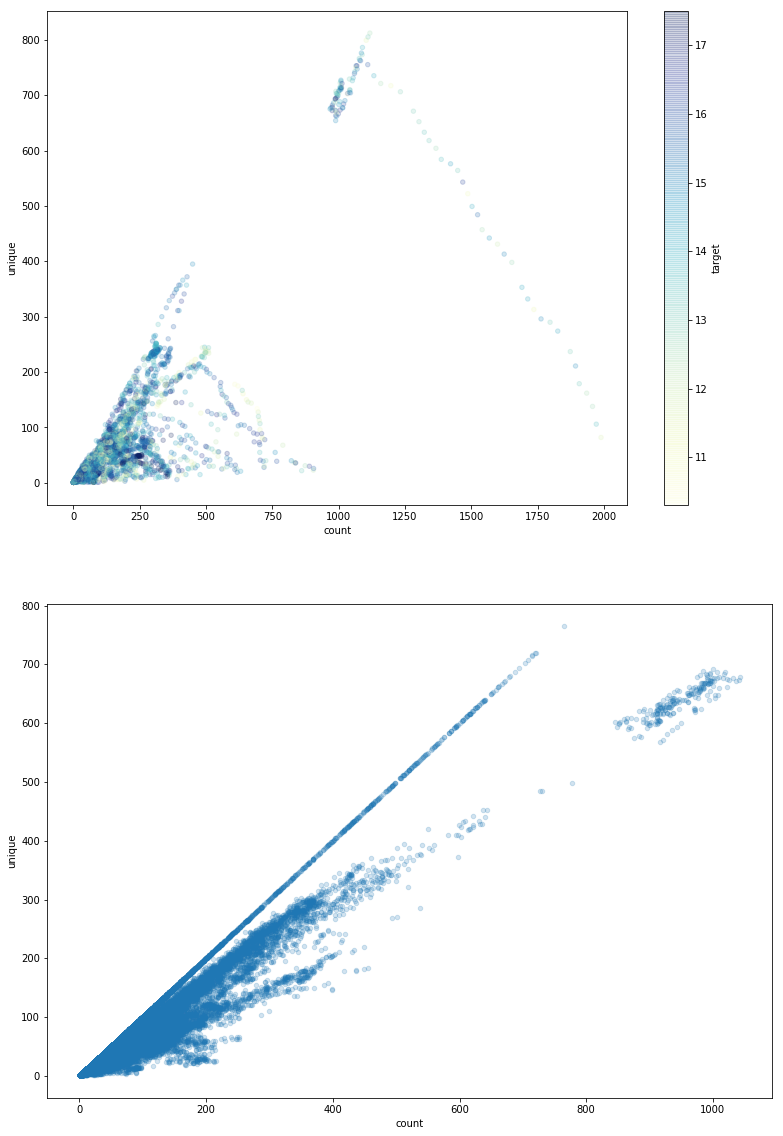

In [0]:
fig, axes = plt.subplots(2,1, figsize=(13,20))

# train_log_feats.plot.scatter(x='count', y='unique', ax=axes[0], c=train_target.target, xlim=(-50, 1050))
pd.merge(train_log_feats, train_target, left_index=True, right_index=True, how='inner').plot.scatter(x='count', y='unique', c='target', ax=axes[0], alpha=0.2, cmap="YlGnBu")
test_log_feats.plot.scatter(x='count', y='unique', ax=axes[1], alpha=0.2)

In [0]:
# Fake training rows (count >= 1000), there is none with count >= 1000 in testing set:
train_raw_feats = pd.read_parquet('./prep/train_raw_feats.snappy.parquet')

In [0]:
fishy_training_rows = train_raw_feats[train_log_stats['count'] >= 1000]
random_training_rows = train_raw_feats.sample(80)

(80, 3374)
(80, 2956)


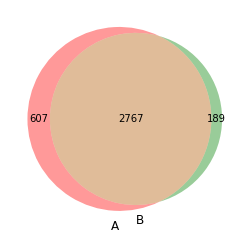

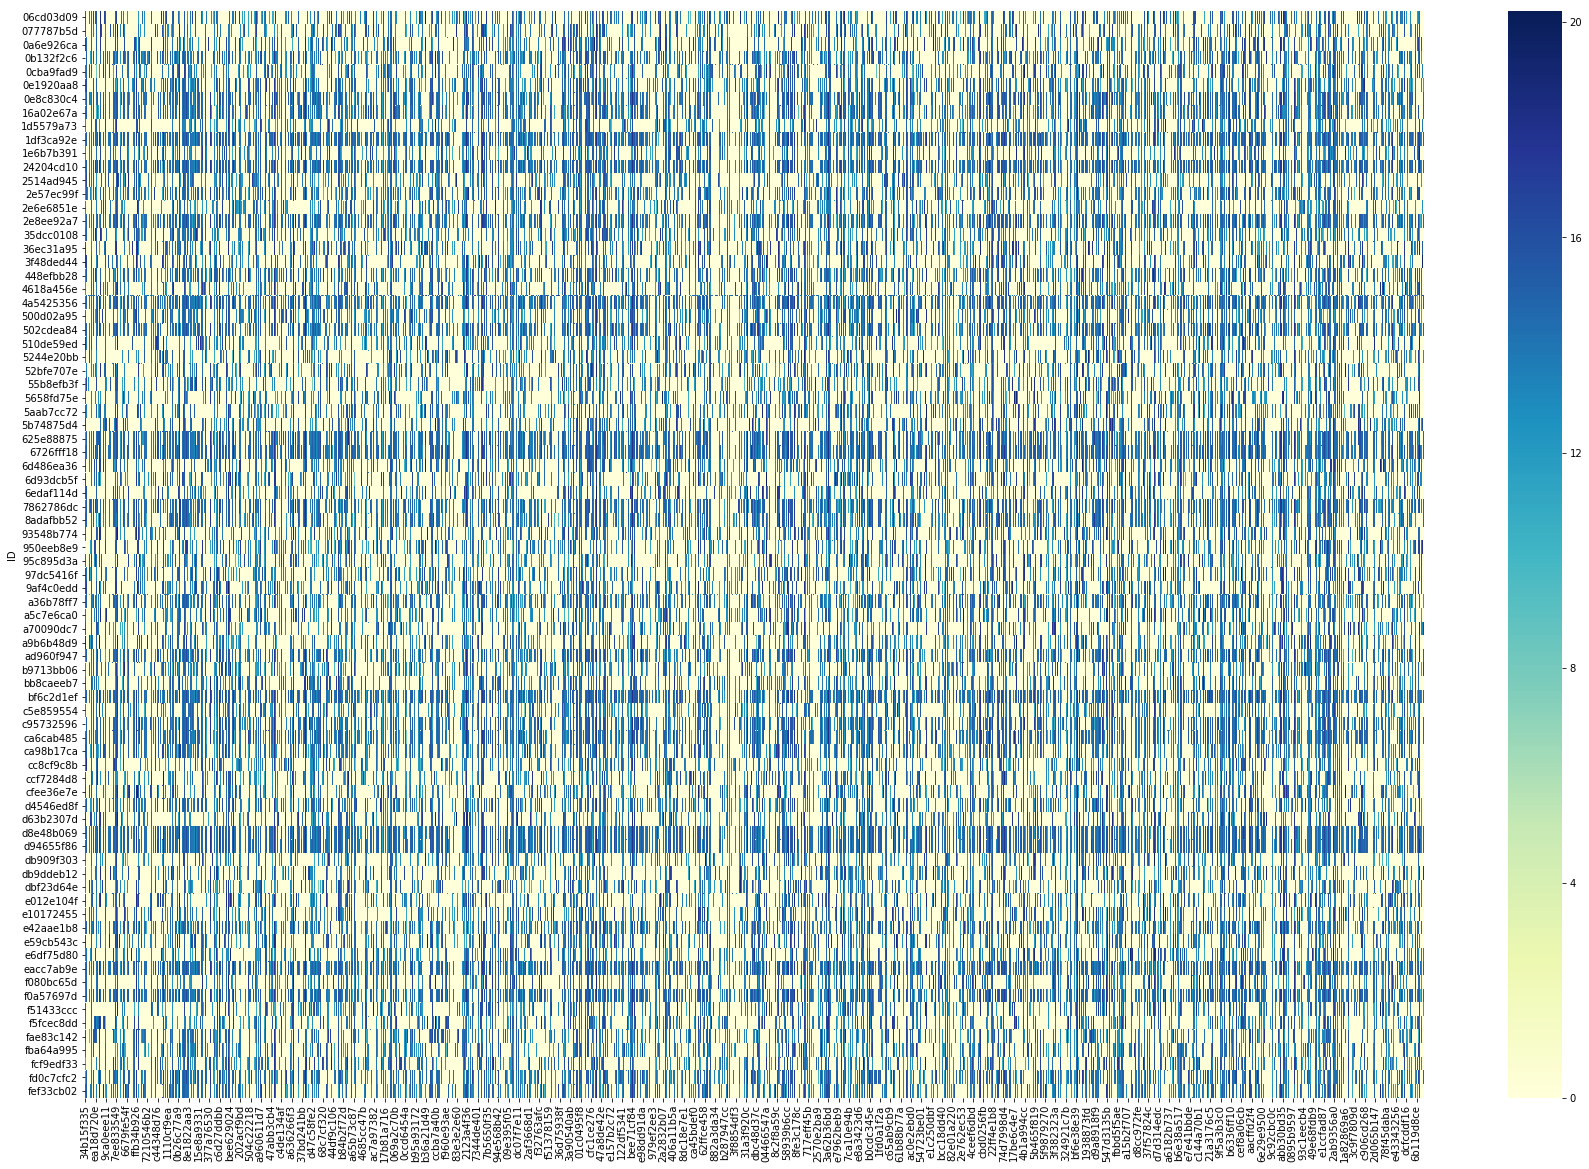

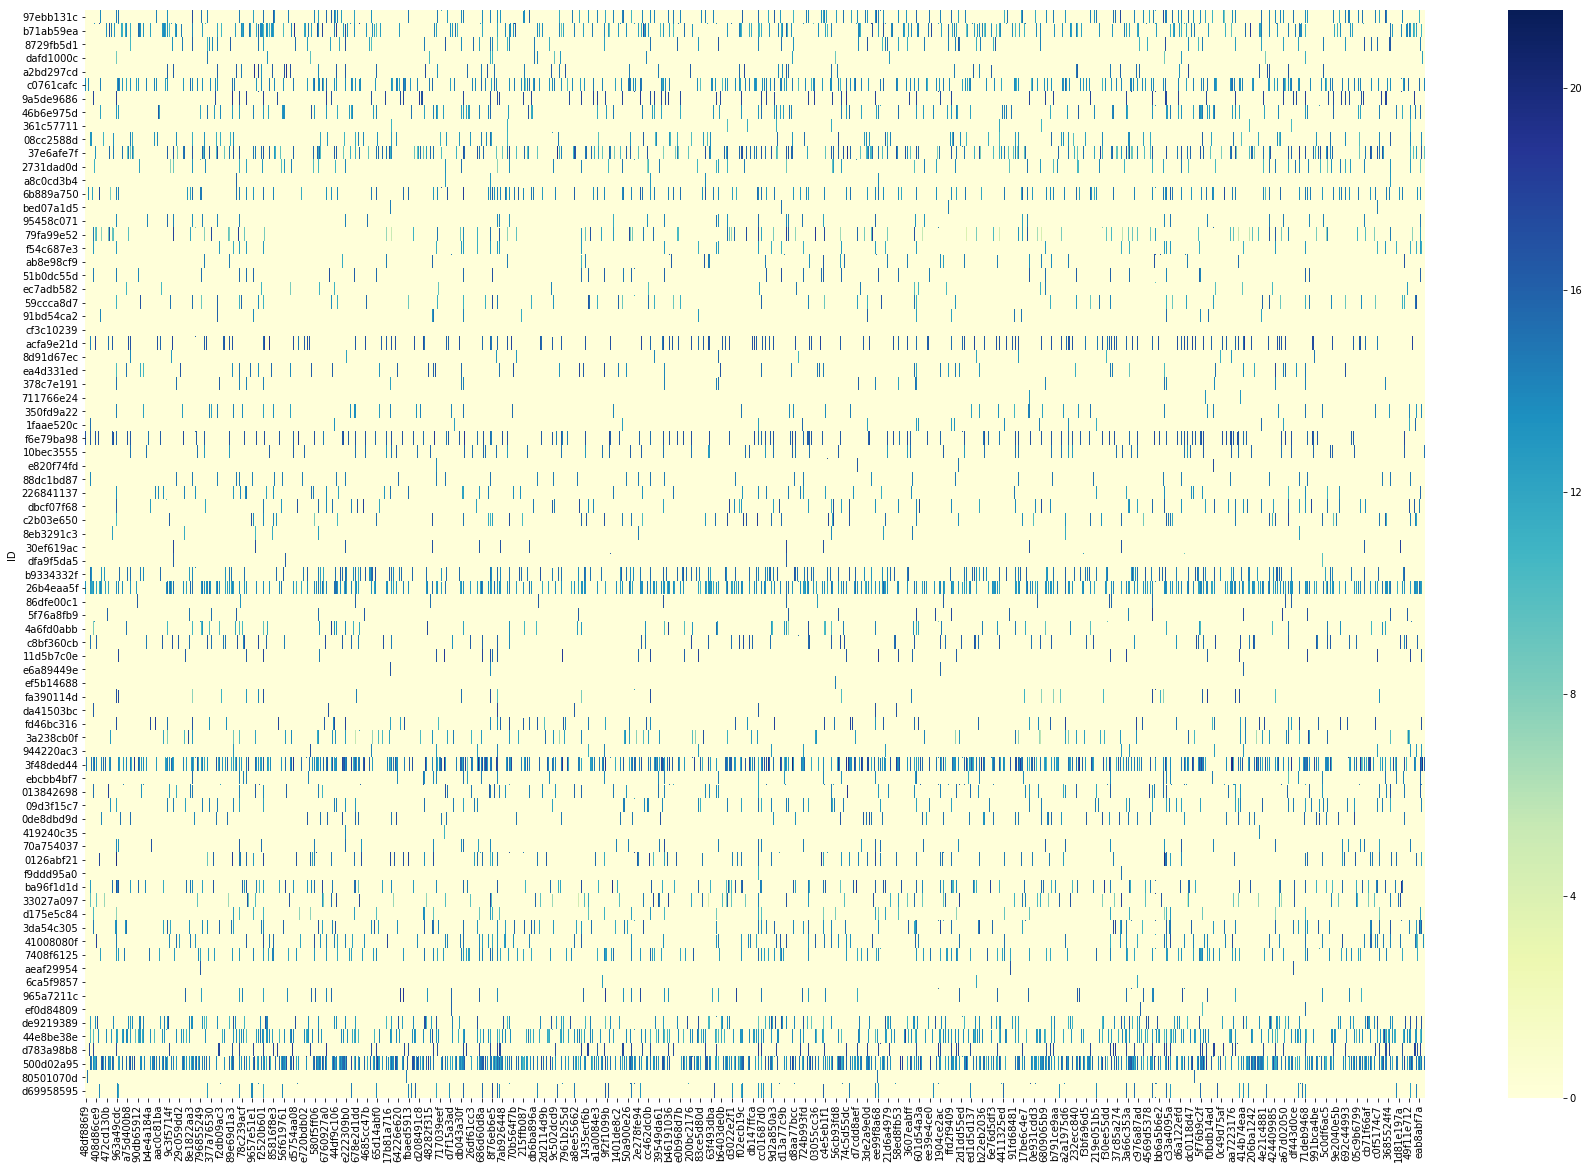

In [0]:
def visual_rows_v2(df):
    import seaborn as sns
    fig, ax = plt.subplots(figsize=(30,20))
    compressed_df = np.log1p(df)
    sns.heatmap(compressed_df, cmap="YlGnBu", ax=ax)
    print(compressed_df.shape)
    
def compare_df(df1, df2):  
  # drop constant columns
  df1 = df1.drop(columns=constant_columns(df1))
  df2 = df2.drop(columns=constant_columns(df2))
  # compare overlapped columns
  from matplotlib_venn import venn2
  venn2([set(df1.columns), set(df2.columns)])
  
  visual_rows_v2(df1)
  visual_rows_v2(df2)

  
compare_df(fishy_training_rows, random_training_rows)


In [0]:
traintrain_log_feats[(train_log_feats['count'] == train_log_feats['unique']) & (train_log_feats['count'] > 2)].index

,count,unique,log_mean,log_median,log_min,log_max,log_25_percentile,log_75_percentile,log_var,log_std,log_skew,log_kurt
ID,,,,,,,,,,,,
008825875,4,4,13.619085,13.542803,12.899222,14.491512,13.203321,13.958568,0.468123,0.684195,0.549830,-0.444244
01b4bd64a,6,6,16.785134,16.667402,16.066802,18.197537,16.219462,16.947984,0.613674,0.783373,1.336267,2.022136
0953d0754,8,8,14.847313,15.472604,11.407576,17.602741,13.555253,15.850590,3.785919,1.945744,-0.566291,0.100684
0d6cfdf99,8,8,14.075057,14.089765,9.798183,18.197537,12.552651,15.604165,7.448670,2.729225,-0.043969,-0.413119
16f95b9ee,4,4,15.276336,16.436308,11.002117,17.230611,14.971454,16.741189,8.273131,2.876305,-1.887158,3.656766
2675946ac,3,3,15.642391,14.508658,13.815512,18.603002,14.162085,16.555830,6.694029,2.587282,1.593247,NaN
294299bd3,8,8,12.627370,12.711330,11.944714,13.353477,12.185717,12.963205,0.249688,0.499688,-0.020159,-1.506663
2e11e7343,3,3,10.902092,10.596660,9.903538,12.206078,10.250099,11.401369,1.395389,1.181266,1.085746,NaN
3fb54ba3f,6,6,16.153916,16.533331,12.611541,17.981555,15.679191,17.535278,3.909627,1.977278,-1.322588,1.758992


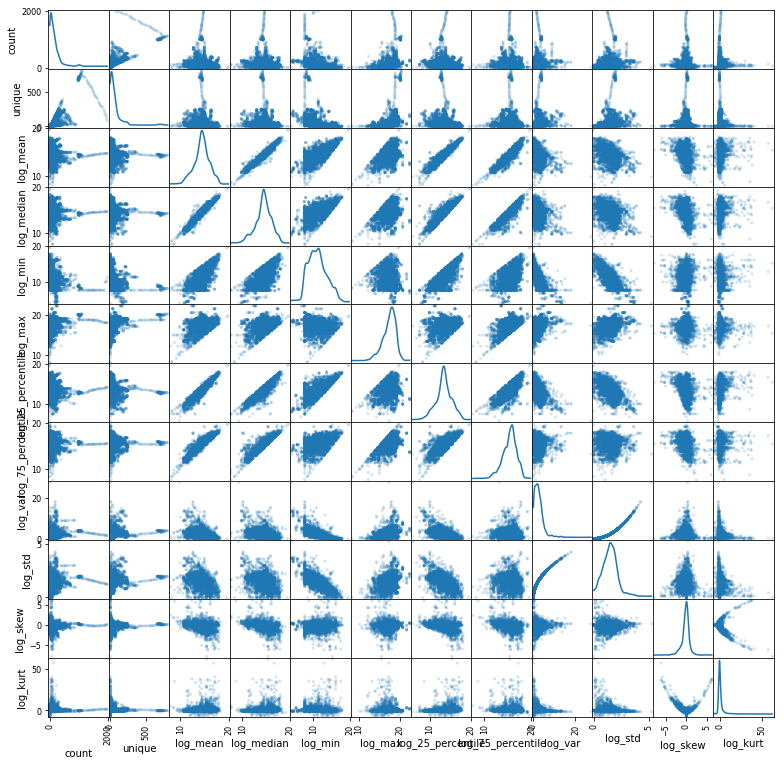

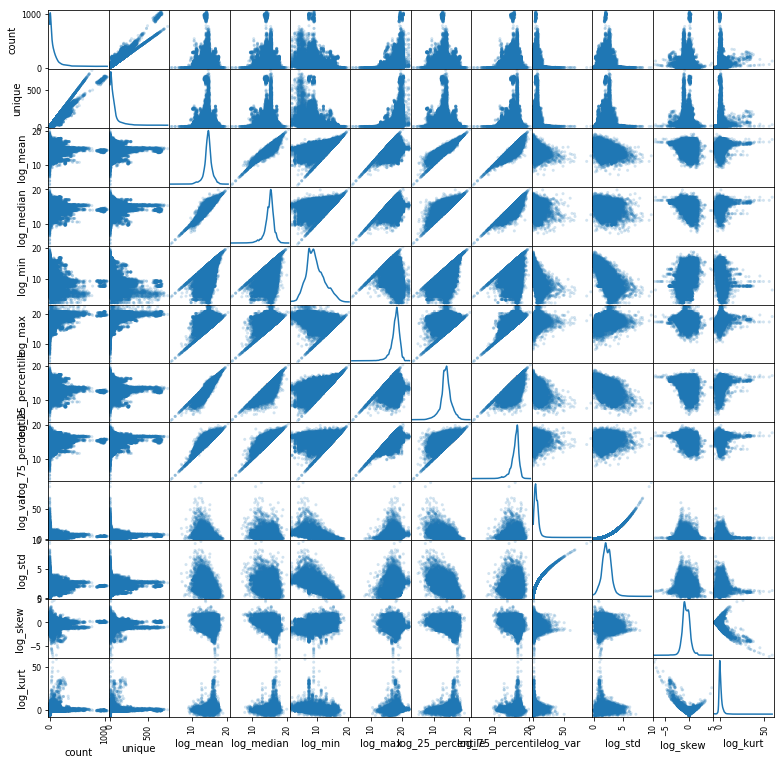

In [0]:
from pandas.plotting import scatter_matrix

_ = scatter_matrix(train_log_stats, alpha=0.2, diagonal='kde', figsize=(13, 13))
_ = scatter_matrix(test_log_stats, alpha=0.2, diagonal='kde', figsize=(13, 13))

In [0]:
train_col_stats = pd.read_parquet('./prep/train_col_stats.snappy.parquet')
test_col_stats = pd.read_parquet('./prep/test_col_stats.snappy.parquet')

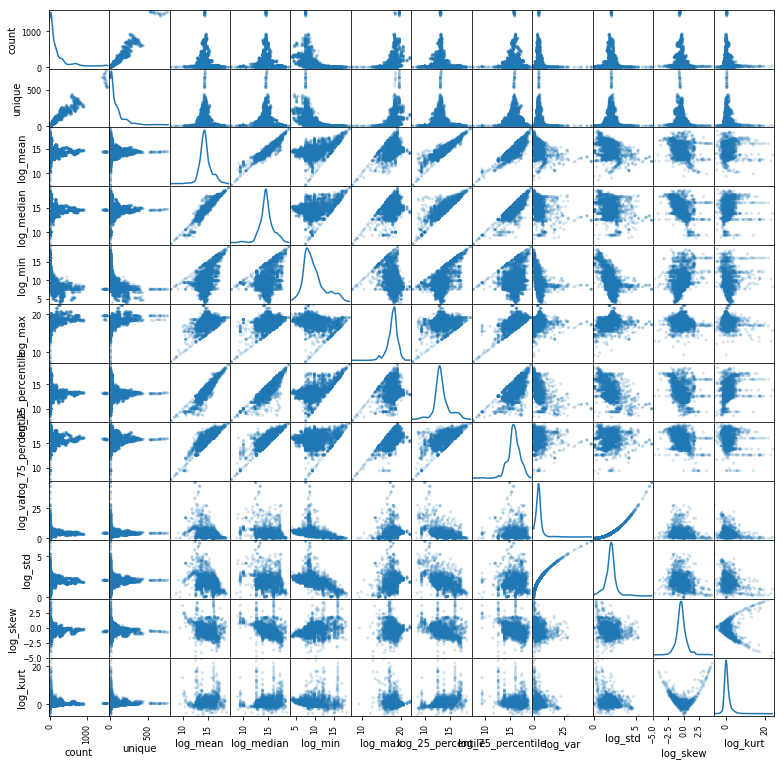

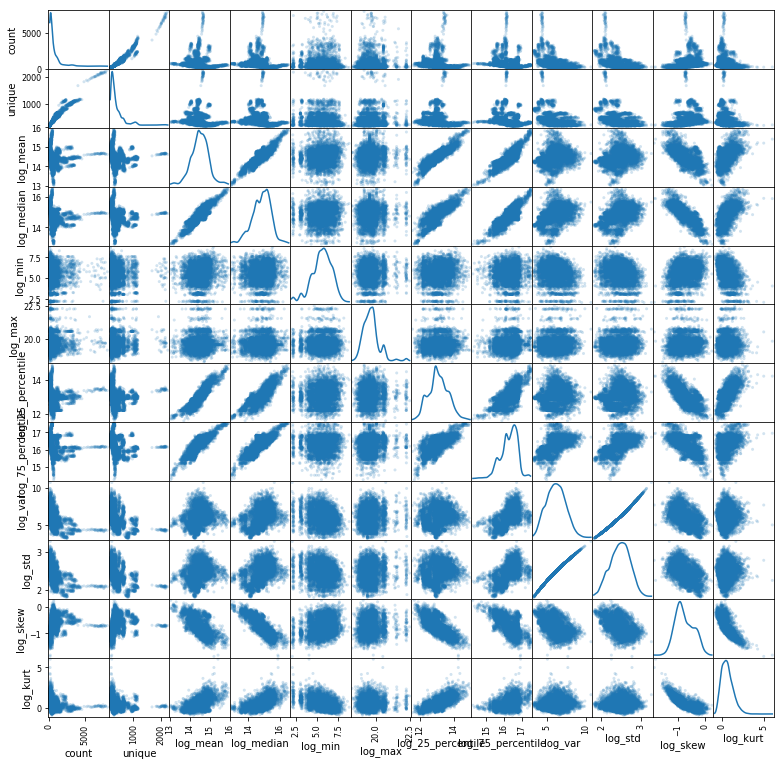

In [0]:
from pandas.plotting import scatter_matrix

_ = scatter_matrix(train_col_stats, alpha=0.2, diagonal='kde', figsize=(13, 13))
_ = scatter_matrix(test_col_stats, alpha=0.2, diagonal='kde', figsize=(13, 13))

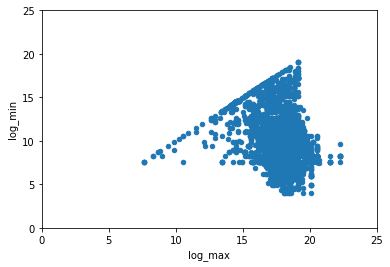

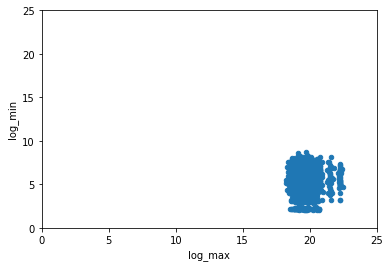

In [0]:
# Training data has a lot column with low count, test data does not, probably due to fake rows
train_col_stats[train_col_stats['count'] >= 0].plot.scatter(x='log_max', y='log_min', xlim=(0,25), ylim=(0,25))
test_col_stats.plot.scatter(x='log_max', y='log_min', xlim=(0,25), ylim=(0,25))

In [0]:
train_col_stats[train_col_stats['log_max'] == train_col_stats['log_min']]

,count,unique,log_mean,log_median,log_min,log_max,log_25_percentile,log_75_percentile,log_var,log_std,log_skew,log_kurt,nz_ratio,unique_ratio
77c9823f2,1,1,10.545368,10.545368,10.545368,10.545368,10.545368,10.545368,NaN,NaN,NaN,NaN,0.000224,0.000224
e90ed19da,1,1,14.914123,14.914123,14.914123,14.914123,14.914123,14.914123,NaN,NaN,NaN,NaN,0.000224,0.000224
cde9c35e8,1,1,14.550759,14.550759,14.550759,14.550759,14.550759,14.550759,NaN,NaN,NaN,NaN,0.000224,0.000224
604ac0633,1,1,7.601402,7.601402,7.601402,7.601402,7.601402,7.601402,NaN,NaN,NaN,NaN,0.000224,0.000224
1de1fda2c,1,1,16.588099,16.588099,16.588099,16.588099,16.588099,16.588099,NaN,NaN,NaN,NaN,0.000224,0.000224
5d26f4d92,1,1,14.436088,14.436088,14.436088,14.436088,14.436088,14.436088,NaN,NaN,NaN,NaN,0.000224,0.000224
4a3248e89,1,1,13.369225,13.369225,13.369225,13.369225,13.369225,13.369225,NaN,NaN,NaN,NaN,0.000224,0.000224
d6033b6eb,1,1,14.508658,14.508658,14.508658,14.508658,14.508658,14.508658,NaN,NaN,NaN,NaN,0.000224,0.000224
bf6f90180,1,1,16.791040,16.791040,16.791040,16.791040,16.791040,16.791040,NaN,NaN,NaN,NaN,0.000224,0.000224
fcab1682f,1,1,16.636890,16.636890,16.636890,16.636890,16.636890,16.636890,NaN,NaN,NaN,NaN,0.000224,0.000224


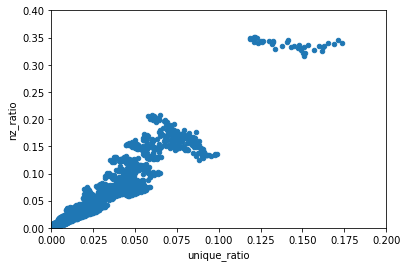

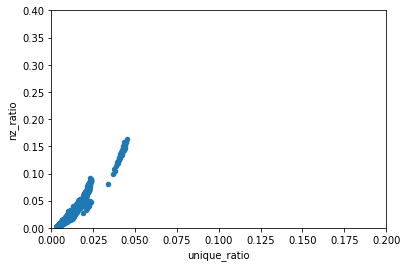

In [0]:
# Remove testing rows and plot again...

train_col_stats['nz_ratio'] = train_col_stats['count'] / len(train_log_stats)
test_col_stats['nz_ratio'] = test_col_stats['count'] / len(test_log_stats)

train_col_stats['unique_ratio'] = train_col_stats['unique'] / len(train_log_stats)
test_col_stats['unique_ratio'] = test_col_stats['unique'] / len(test_log_stats)

train_col_stats.plot.scatter(x='unique_ratio', y='nz_ratio', xlim=(0, 0.2), ylim=(0, 0.4))
test_col_stats.plot.scatter(x='unique_ratio', y='nz_ratio', xlim=(0, 0.2), ylim=(0, 0.4))

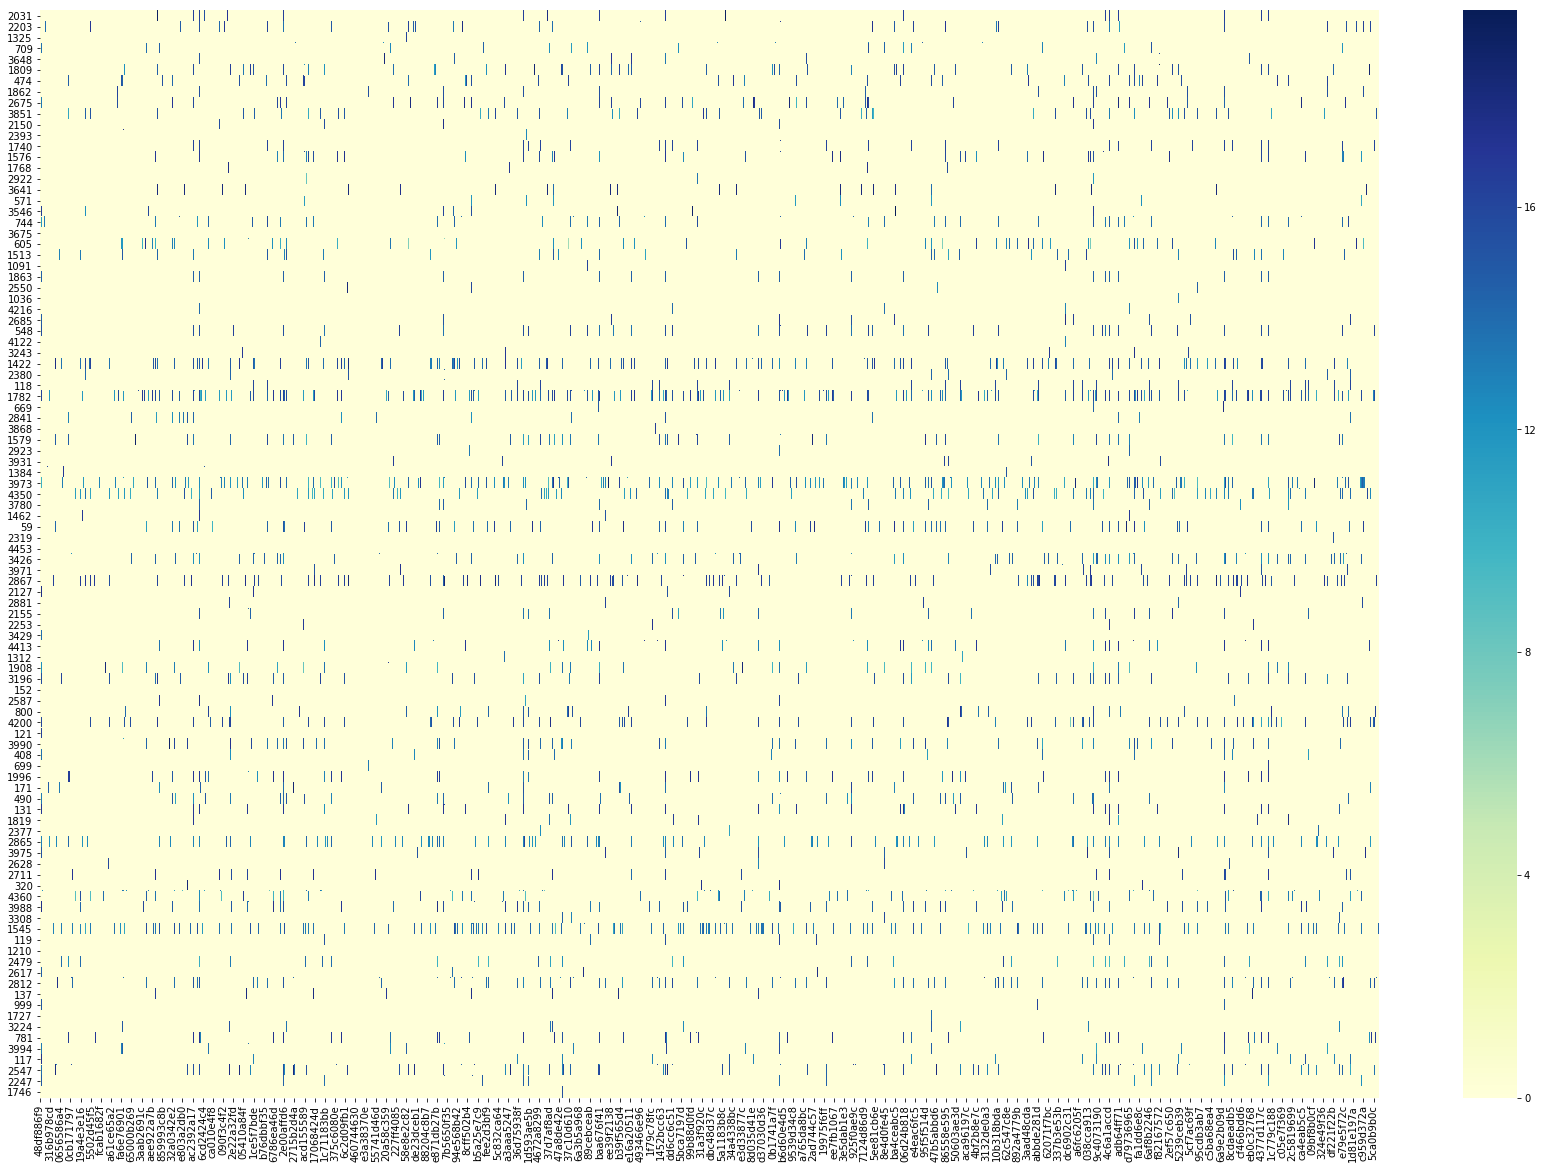

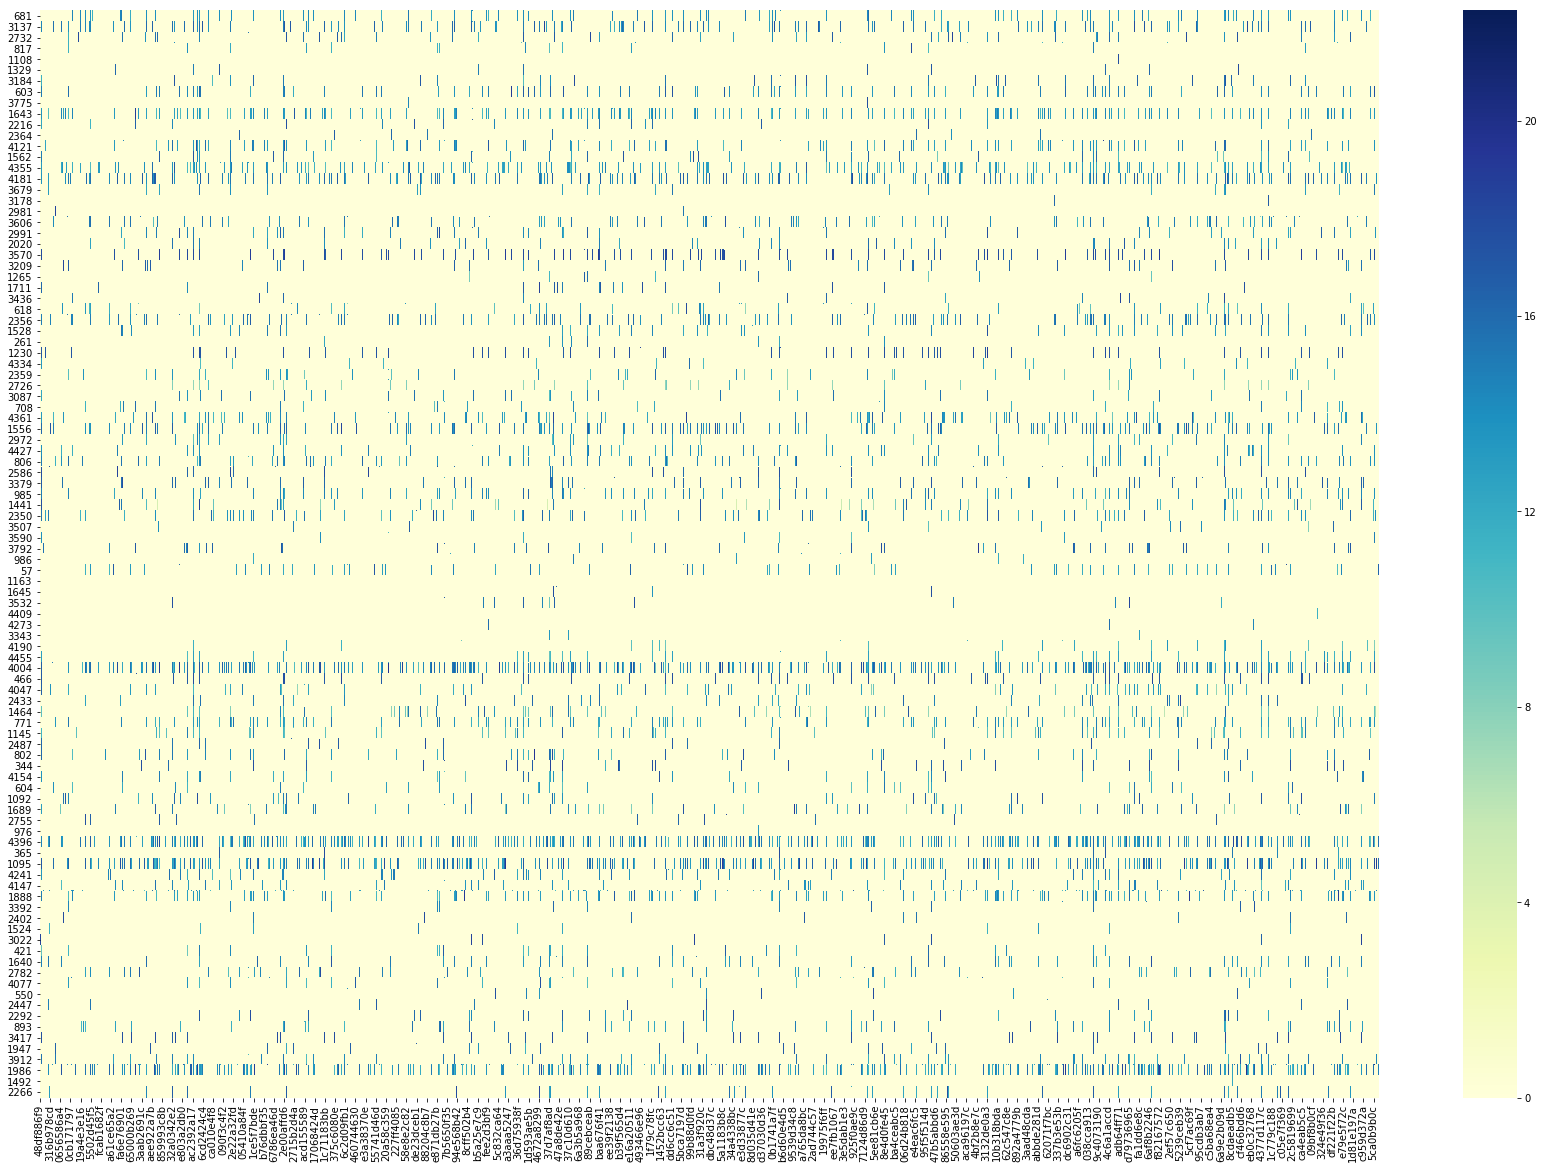

In [0]:
# low non-zero count implies make up values

feat_cols = dfs['train'].columns[2:]

def visual_rows(df):
  import seaborn as sns
  fig, ax = plt.subplots(figsize=(30,20))
  sns.heatmap(np.log1p(df[feat_cols]), cmap="YlGnBu", ax=ax)
  



# dfs['train'][dfs['train'].target == 10000000.0][feat_cols].astype(bool).sum(axis=1)


# df = dfs['train'][dfs['train'].target == 200000.0]
TARGET = 20000000.0
# visual_rows(dfs['train'][dfs['train'].target.isin(target_hist[target_hist>=50].index)].sample(100))
# visual_rows(dfs['train'][~dfs['train'].target.isin(target_hist[target_hist>=50].index)].sample(100))
# dfs['train'][dfs['train'].target == TARGET][feat_cols].replace(0, np.NaN).mode(axis=1, numeric_only=True)

target_hist = dfs['train'].groupby('target').size()
make_up = dfs['train'][dfs['train'].target.isin(target_hist[target_hist>=50].index)]
real = dfs['train'][~dfs['train'].target.isin(target_hist[target_hist>=50].index)]

visual_rows(make_up.sample(100))
visual_rows(real.sample(100))

# make_up = dfs['train'].sample(frac=0.5)
# real = dfs['train'][~dfs['train'].index.isin(make_up.index)]

# from matplotlib_venn import venn2
# venn2([set(constant_columns(make_up)), set(constant_columns(real))], ax=axes[2])

In [0]:
make_up[2:].replace(0, np.NaN).count(axis=1, numeric_only=True).sample(20), real[2:].replace(0, np.NaN).count(axis=1, numeric_only=True).sample(20), 

(2460     13
 601      28
 330      72
 3602     61
 184      41
 3167    112
 1072     18
 1652     30
 2869    123
 205     258
 3238    113
 149     210
 4260     45
 867     344
 1409    361
 318     144
 2489    144
 3062      8
 1043     41
 3674     82
 dtype: int64, 2699    245
 890     185
 4130    105
 3477    269
 1343     13
 4195     47
 328      19
 671      39
 2746    211
 3192    191
 1085     60
 1656     48
 4402      2
 3676    294
 884     107
 2050    524
 3276    313
 3242    195
 645       3
 2553    173
 dtype: int64)

In [0]:
make_up.target

1         600000.0
2       10000000.0
3        2000000.0
7         600000.0
15        800000.0
16        200000.0
25        400000.0
29       4000000.0
31      20000000.0
33      20000000.0
35       6000000.0
36      20000000.0
37       2000000.0
40      20000000.0
41      10000000.0
42       5000000.0
45       4000000.0
49      10000000.0
53       2000000.0
56       6000000.0
59       8000000.0
60      20000000.0
69      10000000.0
72       5000000.0
73       4000000.0
75        200000.0
77        200000.0
78      10000000.0
79       5000000.0
86       1000000.0
           ...    
4388     2000000.0
4389     2000000.0
4393      200000.0
4395    10000000.0
4397     3000000.0
4399      400000.0
4403     4000000.0
4405      400000.0
4408     4000000.0
4410    10000000.0
4411    10000000.0
4413      200000.0
4418     4000000.0
4420    10000000.0
4431    20000000.0
4432    20000000.0
4435      800000.0
4436    20000000.0
4437     5000000.0
4438     6000000.0
4441      600000.0
4442     200

In [0]:
dfs['train'].iloc[345][2:][dfs['train'].iloc[345][2:] > 0]

bc2bf3bcd      6000
9581ec522     10000
6fa35fbba    600000
bd6da0cca     80000
99cc87fd7     1e+06
9fd594eec    400000
e1d0e11b5    400000
491b9ee45     80000
70feb1494    100000
4b9540ab3     50000
230a025ca     1e+06
8781e4b91    100000
Name: 345, dtype: object

In [0]:
dfs['train'].iloc[3832][feat_cols][dfs['train'].iloc[3832][feat_cols] > 0]

20aa07010        1.2e+06
d966ac62c        5000000
87ffda550         300000
251d1aa17          5e+06
0a69cc2be        1.4e+07
963a49cdc          30000
1e8801477        8740000
68a945b18        4.6e+06
0e1f6696a          2e+06
770bef1c6         500000
b30e932ba          1e+06
d0d340214         300000
05d17ab7a         280000
9ba5eb33d       11400000
377a76530         800000
861076e21    5.66667e+06
dbfa2b77f        2.6e+06
05527f031       1.66e+06
6c0e0801a          5e+06
bee629024        3.6e+06
26fc93eb7         170000
20442bac4          1e+07
76a75bd91        4000000
66ace2992        1.1e+06
ca010e4f8         235000
ec827621a         500000
8cc831c8b        1000000
54a1765cc         600000
ecb354edf        3.5e+06
8337d1adc         600000
                ...     
df28ac53d        7600000
5c6487af1        3.3e+06
94f3dcaee        2000000
949ed0965          50000
95cdb3ab7       2.06e+06
f190486d6         300000
5ed0c24d0         700000
c4972742d         500000
962424dd3          1e+06


In [0]:
dfs['train']['occurs'] = dfs['train'].apply(lambda x: len(x[2:][x[2:] == x.target]), axis=1)

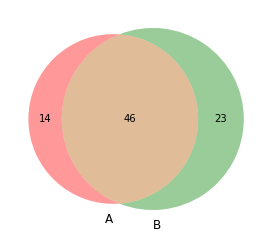

In [0]:
from matplotlib_venn import venn2

venn2([set(dfs['train'][dfs['train']['occurs'] > 2].target.astype(int)), set(target_hist[target_hist>=8].index.astype(int))])

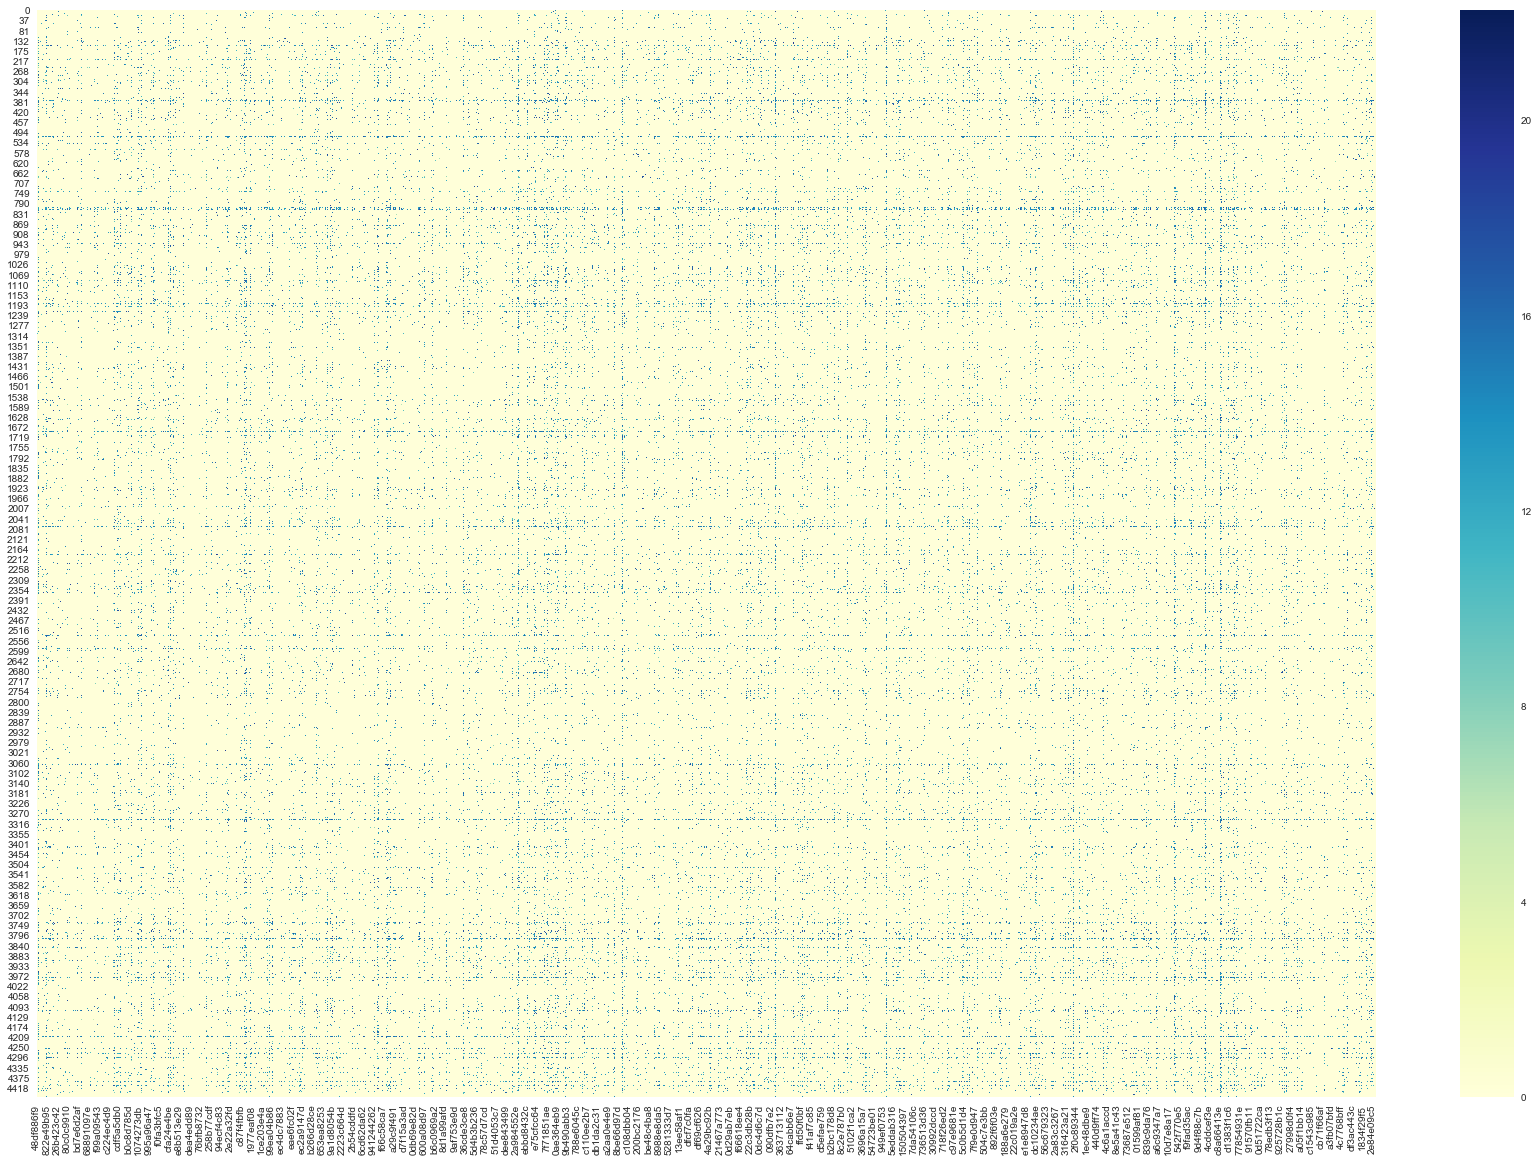

In [0]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(np.log(dfs['train'][dfs['train']['occurs'] == 0][dfs['train'].columns[2:]]+1), cmap="YlGnBu", ax=ax)

In [0]:
# seperate users with copied target

dfs['train']['copied_target'] = dfs['train']['occurs'] > 0

import numpy as np
>>> from sklearn.manifold import TSNE
>>> X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
>>> X_embedded = TSNE(n_components=2).fit_transform(X)
>>> X_embedded.shape

0       38000000.00
1         600000.00
2       10000000.00
3        2000000.00
4       14400000.00
5        2800000.00
6         164000.00
7         600000.00
8         979000.00
9         460000.00
10       1100000.00
11      16000000.00
12        354000.00
13       7000000.00
14        100000.00
15        800000.00
16        200000.00
17       3600000.00
18       2786000.00
19         40000.00
20       1600000.00
21       3266666.66
22       6140000.00
23      14886000.00
24        833333.34
25        400000.00
26       6500000.00
27       1700000.00
28        933333.34
29       4000000.00
           ...     
4429     1066666.66
4430    20100000.00
4431    20000000.00
4432    20000000.00
4433     2200000.00
4434       74000.00
4435      800000.00
4436    20000000.00
4437     5000000.00
4438     6000000.00
4439     4666666.66
4440       60000.00
4441      600000.00
4442     2000000.00
4443      528666.66
4444      300000.00
4445     1000000.00
4446    10000000.00
4447     4000000.00


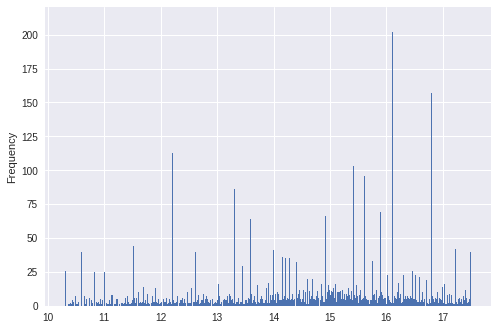

In [0]:
np.log(dfs['train'].target).plot.hist(bins=500)

In [0]:
# Check column density (assume)

Index(['ID', 'target', '48df886f9', '0deb4b6a8', '34b15f335', 'a8cb14b00',
       '2f0771a37', '30347e683', 'd08d1fbe3', '6ee66e115',
       ...
       '3ecc09859', '9281abeea', '8675bec0b', '3a13ed79a', 'f677d4d13',
       '71b203550', '137efaa80', 'fb36b89d9', '7e293fbaf', '9fc776466'],
      dtype='object', length=4993)

In [0]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()

# f, ax = plt.subplots(figsize=(9, 6))
# sns.heatmap(dfs['train'][dfs['train'].columns[1:]].sample(1000).values, linewidths=.5, ax=ax)